In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_graph(lang, method):
    df = pd.read_csv(f'Results/{lang}_{method}_results.csv')
    plt.figure(figsize=(4, 3))
    plt.title(f'{lang} {method} Results')
    plt.xlabel('Similarity to Legal Text')
    plt.ylabel('Similarity to TV Captions')
    
    # Assign colors based on the "Domain" column
    domains = df['Domain'].unique()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(domains)))
    color_dict = {domain: color for domain, color in zip(domains, colors)}
    
    for domain in domains:
        subset = df[df['Domain'] == domain]
        plt.scatter(subset['Similarity to Legal'], subset['Similarity to TV'], label=domain, color=color_dict[domain])

    xlim = plt.xlim()
    ylim = plt.ylim()

    max_value = max(df['Similarity to Legal'].max(), df['Similarity to TV'].max())
    plt.plot([0, max_value], [0, max_value], color='grey', linestyle='--', linewidth=1)

    plt.xlim(xlim)
    plt.ylim(ylim)
    
    plt.legend()
    plt.savefig(f'Graphs/{lang}_{method}_results.png', bbox_inches='tight')
    plt.show()

    similarity_to_legal_sum = 0
    similarity_to_tv_sum = 0
    similarity_to_web_sum = 0
    num = 0

    for _, row in df.iterrows():
        if row['Domain'] == 'Web':
            num += 1
            similarity_to_legal_sum += row['Similarity to Legal']
            similarity_to_tv_sum += row['Similarity to TV']
            similarity_to_web_sum += row['Similarity to Web']

    print(f"Total 'Similarity to Legal' for 'Web' domain: {similarity_to_legal_sum / num}")
    print(f"Total 'Similarity to TV' for 'Web' domain: {similarity_to_tv_sum / num}")
    print(f"Total 'Similarity to Web' for 'Web' domain: {similarity_to_web_sum / num}")


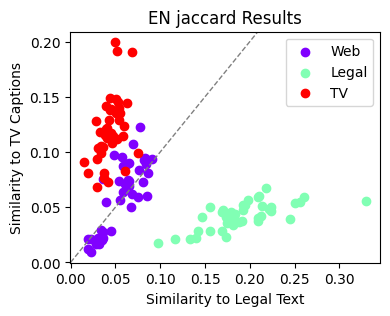

Total 'Similarity to Legal' for 'Web' domain: 0.055245654046027694
Total 'Similarity to TV' for 'Web' domain: 0.060209818788816115
Total 'Similarity to Web' for 'Web' domain: 0.0702465306531576


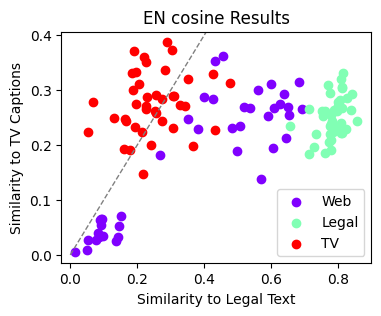

Total 'Similarity to Legal' for 'Web' domain: 0.3690638533391123
Total 'Similarity to TV' for 'Web' domain: 0.17699799059888527
Total 'Similarity to Web' for 'Web' domain: 0.2710832817380702


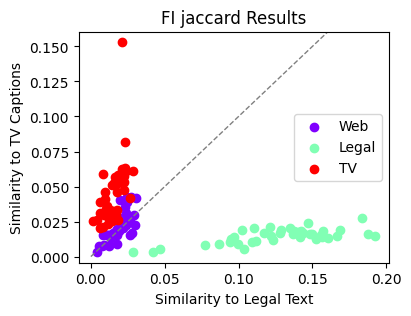

Total 'Similarity to Legal' for 'Web' domain: 0.018995849810600676
Total 'Similarity to TV' for 'Web' domain: 0.02194254075801554
Total 'Similarity to Web' for 'Web' domain: 0.02494140625600102


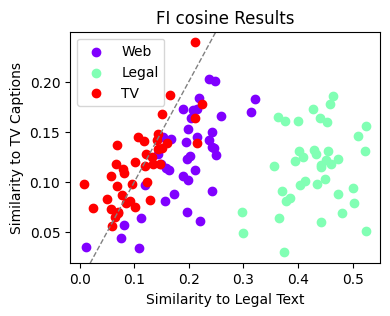

Total 'Similarity to Legal' for 'Web' domain: 0.19177951369845408
Total 'Similarity to TV' for 'Web' domain: 0.12420561545433124
Total 'Similarity to Web' for 'Web' domain: 0.17838338382524482


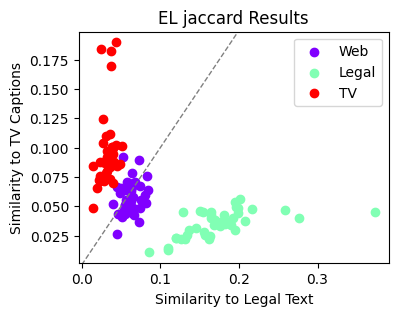

Total 'Similarity to Legal' for 'Web' domain: 0.06152500731410852
Total 'Similarity to TV' for 'Web' domain: 0.05806409476834361
Total 'Similarity to Web' for 'Web' domain: 0.07415774868969197


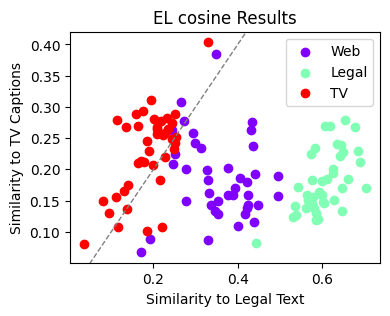

Total 'Similarity to Legal' for 'Web' domain: 0.3555130922733528
Total 'Similarity to TV' for 'Web' domain: 0.18496646640968373
Total 'Similarity to Web' for 'Web' domain: 0.29334513737466456


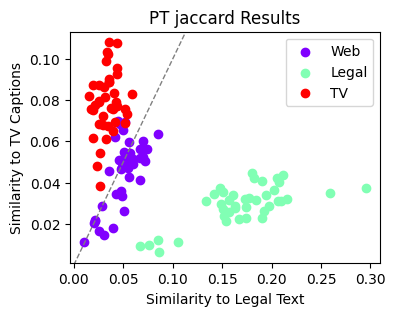

Total 'Similarity to Legal' for 'Web' domain: 0.04952617561076927
Total 'Similarity to TV' for 'Web' domain: 0.045088416667994985
Total 'Similarity to Web' for 'Web' domain: 0.05813610015343412


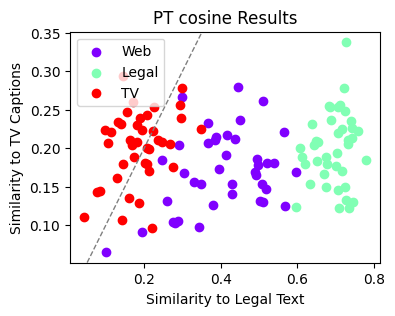

Total 'Similarity to Legal' for 'Web' domain: 0.40421656265784317
Total 'Similarity to TV' for 'Web' domain: 0.17058466947502238
Total 'Similarity to Web' for 'Web' domain: 0.31631903503104863


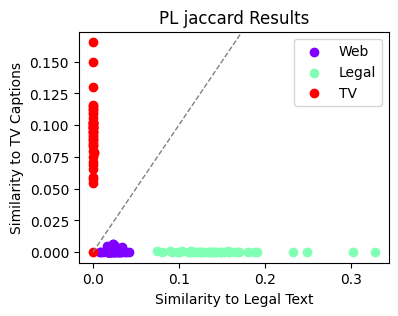

Total 'Similarity to Legal' for 'Web' domain: 0.0243045549731077
Total 'Similarity to TV' for 'Web' domain: 0.0011875139197858576
Total 'Similarity to Web' for 'Web' domain: 0.031862070339360234


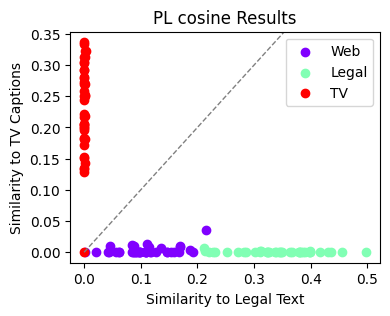

Total 'Similarity to Legal' for 'Web' domain: 0.1073078206082958
Total 'Similarity to TV' for 'Web' domain: 0.002960047715361308
Total 'Similarity to Web' for 'Web' domain: 0.11903634367645972


In [70]:
to_do = [(i, j)for i in['EN', 'FI', 'EL', 'PT', 'PL'] for j in ['jaccard', 'cosine']]

for i, j in to_do:
    create_graph(i, j)